In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.lines import Line2D
plt.style.use(["science","grid"])
def normalise(arr):
    arrmax = np.max(arr)
    arrmin = np.min(arr)
    
    arrnorm = (arr - arrmin) / (arrmax - arrmin)
    
    return arrnorm
def ticks_labels(nb_days):
    if 30%nb_days != 0:
        raise ValueError 
    else:
        vec = np.linspace(0,4320,int(30/nb_days)+1)
        labs = list()
        for i in range(int(30/nb_days)+1):
            labs.append("Day %s"%(i*nb_days))
        return vec,labs

my_palette = {}
my_palette['dark'] = ['midnightblue', 'chocolate', 'darkolivegreen']
my_palette['light'] = ['cornflowerblue','orange','yellowgreen']
my_palette['reds'] = []

In [2]:
data1 = pd.read_feather("./rerouting30/rerouting30_beta0.0") # rerouting 30                        
data2 = pd.read_feather("./rerouting30/rerouting30_beta1.0") # rerouting 30

input1 = pd.read_csv("./rerouting30/input_parameters_rerouting30_beta0.0.csv")
input2 = pd.read_csv("./rerouting30/input_parameters_rerouting30_beta1.0.csv")

data2.o0 = data2.o0+(np.max(data1.o0)+1)

data = pd.concat([data1,data2]).reset_index()
input_vars = pd.concat([input1,input2]).reset_index()

In [3]:
q_sum = list()
n_facs = 12
for j in input_vars.index:
    tmp_sum = 0
    for i in range(n_facs):
        tmp_sum += ( np.sum(data[data.o0==j].iloc[:,i+4]))  
    
    q_sum.append(tmp_sum)    

uc_endvals_dict = {}
for i in ["unsatisfied consumption","policy type","variation","allfacs","fac5"]:
    uc_endvals_dict[i] = list()


for j in input_vars.index:
    uc_endvals_dict["unsatisfied consumption"].append(data.o1[data.o0==j].iloc[-1])
    uc_endvals_dict["fac5"].append( np.sum(data[data.o0==j].iloc[:,9]))
    uc_endvals_dict["allfacs"].append( q_sum[j] )

    if input_vars.capacity_policy[j] > 0:
        uc_endvals_dict["policy type"].append(1)
        uc_endvals_dict["variation"].append(input_vars.capacity_policy[j])
    elif input_vars.rerouting_policy[j] > 0:
        uc_endvals_dict["policy type"].append(2)
        uc_endvals_dict["variation"].append(input_vars.rerouting_policy[j])
    else:
        uc_endvals_dict["policy type"].append(0)
        uc_endvals_dict["variation"].append(0)    

uc_endvals_df = pd.DataFrame(uc_endvals_dict)
input_vars_filtered = pd.concat([input_vars,uc_endvals_df],axis=1)

<ipython-input-18-6b5eaaf250c0>:40: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(np.linspace(0,100,6))


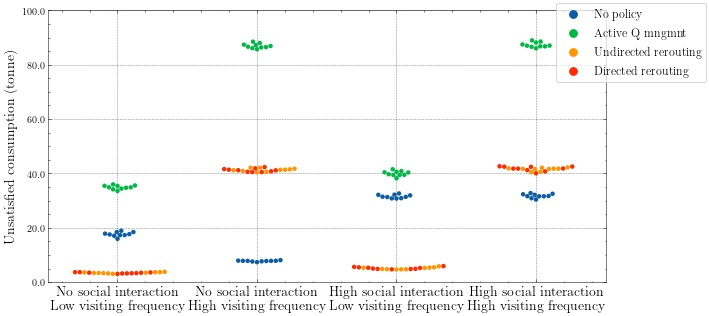

In [18]:
fig, ax = plt.subplots(1,1,figsize=(10,5))

input_vars_filtered = input_vars_filtered[input_vars_filtered["policy type"] != 1]

tmp1 = input_vars_filtered[input_vars_filtered.beta == 0.0]
tmp1 = tmp1[tmp1.alpha==1.0]
tmp1 = tmp1[tmp1.epsilon==0.1]

tmp2 = tmp1[tmp1.gamma==3.0]
tmp2 = tmp2[tmp2.parallel_served_full==7.8]

tmp1 = tmp1[tmp1.gamma==7.0]
tmp1 = tmp1[tmp1.parallel_served_full==6.0]
#########
tmp3 = input_vars_filtered[input_vars_filtered.beta == 1.0]
tmp3 = tmp3[tmp3.epsilon==0.1]

tmp4 = tmp3[tmp3.gamma==3.0]
tmp4 = tmp4[tmp4.parallel_served_full==7.8]

tmp3 = tmp3[tmp3.gamma==7.0]
tmp3 = tmp3[tmp3.parallel_served_full==6.0]


tmp1 = pd.concat([tmp1.reset_index(),pd.DataFrame({"scenario":np.ones(len(tmp1))*0})],axis=1)
tmp2 = pd.concat([tmp2.reset_index(),pd.DataFrame({"scenario":np.ones(len(tmp2))*1})],axis=1)
tmp3 = pd.concat([tmp3.reset_index(),pd.DataFrame({"scenario":np.ones(len(tmp3))*2})],axis=1)
tmp4 = pd.concat([tmp4.reset_index(),pd.DataFrame({"scenario":np.ones(len(tmp4))*3})],axis=1)
tmp = pd.concat([tmp1,tmp2,tmp3,tmp4])

sns.swarmplot(ax=ax ,x='scenario',hue='variation', y="unsatisfied consumption", data=tmp,size=4.5)#palette=my_palette['dark'])

ax.set_xlabel(None)#r"Type of policy",fontsize=12)
ax.set_xticklabels(["No social interaction\nLow visiting frequency",
                   "No social interaction\nHigh visiting frequency",
                   "High social interaction\nLow visiting frequency",
                   "High social interaction\nHigh visiting frequency"],fontsize=14)

ax.set_ylim([0,100e3])
ax.set_yticklabels(np.linspace(0,100,6))
ax.set_ylabel("Unsatisfied consumption (tonne)",fontsize=14)

ax.yaxis.grid(True) # Hide the horizontal gridlines
ax.xaxis.grid(True) # Show the vertical gridlines

handles = ax.get_legend_handles_labels()[0]

labels = ["No policy","Active Q mngmnt","Undirected rerouting","Directed rerouting"]

ax.legend(handles[:4],labels,loc='upper left',fontsize=12,bbox_to_anchor=(0.9, 1.05),framealpha=0.75);
# ax.set_title("a) Scenario without social interaction between agents",fontsize=14);

plt.savefig("/home/daan/Desktop/unsatisfiedconsumption_rerouting.png")

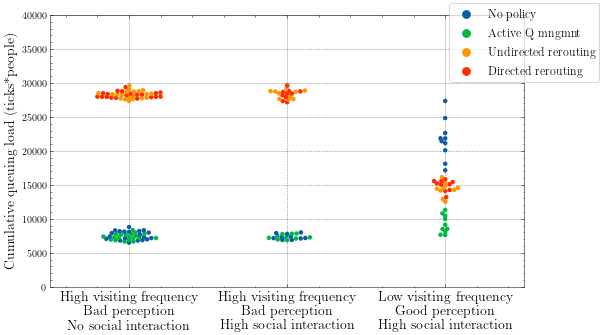

In [19]:
fig, ax = plt.subplots(1,1,figsize=(8.5,5))

input_vars_filtered = input_vars_filtered[input_vars_filtered["policy type"] != 1]

tmp1 = input_vars_filtered[input_vars_filtered.gamma == 3.0]
# tmp1 = tmp1[tmp1.alpha==1.0]
tmp1 = tmp1[tmp1.epsilon==0.1]
tmp1 = tmp1[tmp1.parallel_served_full==7.8]

tmp2 = tmp1[tmp1.beta==1.0]
tmp1 = tmp1[tmp1.beta==0.0]
#########
tmp3 = input_vars_filtered[input_vars_filtered.beta == 1.0]
tmp3 = tmp3[tmp3.epsilon==1.0]

tmp3 = tmp3[tmp3.gamma==7.0]
tmp3 = tmp3[tmp3.parallel_served_full==6.0]


tmp1 = pd.concat([tmp1.reset_index(),pd.DataFrame({"scenario":np.ones(len(tmp1))*0})],axis=1)
tmp2 = pd.concat([tmp2.reset_index(),pd.DataFrame({"scenario":np.ones(len(tmp2))*1})],axis=1)
tmp3 = pd.concat([tmp3.reset_index(),pd.DataFrame({"scenario":np.ones(len(tmp3))*2})],axis=1)
tmp = pd.concat([tmp1,tmp2,tmp3])

sns.swarmplot(ax=ax ,x='scenario',hue='variation', y="fac5", data=tmp,size=4.5)#palette=my_palette['dark'])

ax.set_xlabel(None)#r"Type of policy",fontsize=12)
ax.set_xticklabels(["High visiting frequency\nBad perception\nNo social interaction",
                   "High visiting frequency\nBad perception\nHigh social interaction",
                   "Low visiting frequency\nGood perception\nHigh social interaction"],fontsize=14)

ax.set_ylim([0,40e3])
# ax.set_yticklabels(np.linspace(0,100,6))
ax.set_ylabel("Cumulative queuing load (ticks*people)",fontsize=14)

ax.yaxis.grid(True) # Hide the horizontal gridlines
ax.xaxis.grid(True) # Show the vertical gridlines

handles = ax.get_legend_handles_labels()[0]

labels = ["No policy","Active Q mngmnt","Undirected rerouting","Directed rerouting"]

ax.legend(handles[:4],labels,loc='center',fontsize=12,bbox_to_anchor=(1.0, 0.9),framealpha=0.75);
plt.savefig("/home/daan/Desktop/fac5_rerouting.png")

Regarding unsatisfied consumption we observe similar tendencies so only evaluating for gamma 7/6.0

* b 0.0 1.0 0.0 1.0
* g 7.0 7.0 3.0 3.0
* e -.- 0.1 -.- 0.1
* a 1.0 -.- 1.0 -.-

In a highly social population we observe high unsatisfied consumption for e=0.1 g=3/7 
And not related to e in an unsocial population for a=0.1 

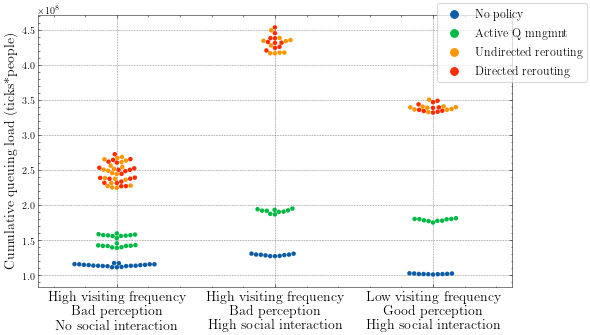

In [23]:
fig, ax = plt.subplots(1,1,figsize=(8.5,5))

input_vars_filtered = input_vars_filtered[input_vars_filtered["policy type"] != 1]

tmp1 = input_vars_filtered[input_vars_filtered.gamma == 7.0]
tmp1 = tmp1[tmp1.parallel_served_full==6.0]
tmp2 = tmp1[tmp1.beta==1.0]
tmp2 = tmp2[tmp2.epsilon==1.0]

tmp1 = tmp1[tmp1.beta==0.0]
tmp1 = tmp1[tmp1.alpha==1.0]
#########
tmp3 = input_vars_filtered[input_vars_filtered.beta == 1.0]
tmp3 = tmp3[tmp3.epsilon==1.0]
tmp3 = tmp3[tmp3.gamma==3.0]
tmp3 = tmp3[tmp3.parallel_served_full==7.8]


tmp1 = pd.concat([tmp1.reset_index(),pd.DataFrame({"scenario":np.ones(len(tmp1))*0})],axis=1)
tmp2 = pd.concat([tmp2.reset_index(),pd.DataFrame({"scenario":np.ones(len(tmp2))*1})],axis=1)
tmp3 = pd.concat([tmp3.reset_index(),pd.DataFrame({"scenario":np.ones(len(tmp3))*2})],axis=1)
tmp = pd.concat([tmp1,tmp2,tmp3])

sns.swarmplot(ax=ax ,x='scenario',hue='variation', y="allfacs", data=tmp,size=4.5)#palette=my_palette['dark'])

ax.set_xlabel(None)#r"Type of policy",fontsize=12)
ax.set_xticklabels(["High visiting frequency\nBad perception\nNo social interaction",
                   "High visiting frequency\nBad perception\nHigh social interaction",
                   "Low visiting frequency\nGood perception\nHigh social interaction"],fontsize=14)

# ax.set_ylim([0,40e3])
# ax.set_yticklabels(np.linspace(0,100,6))
ax.set_ylabel("Cumulative queuing load (ticks*people)",fontsize=14)

ax.yaxis.grid(True) # Hide the horizontal gridlines
ax.xaxis.grid(True) # Show the vertical gridlines

handles = ax.get_legend_handles_labels()[0]

labels = ["No policy","Active Q mngmnt","Undirected rerouting","Directed rerouting"]

ax.legend(handles[:4],labels,loc='center',fontsize=12,bbox_to_anchor=(1.0, 0.9),framealpha=0.75);
plt.savefig("/home/daan/Desktop/allfacs_rerouting.png")